<a href="https://colab.research.google.com/github/akshitjain2004/Machine-Learning/blob/main/KMeansClusteringAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
#dataset generator
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
print(X)

[[-5.37039106  3.47555168]
 [ 5.84161203 -3.98182959]
 [ 1.76127766  9.39696306]
 ...
 [ 6.14147823 -5.75491603]
 [-5.45330839  1.75599573]
 [-0.21966953  8.72922042]]


In [4]:
X.shape

(1000, 2)

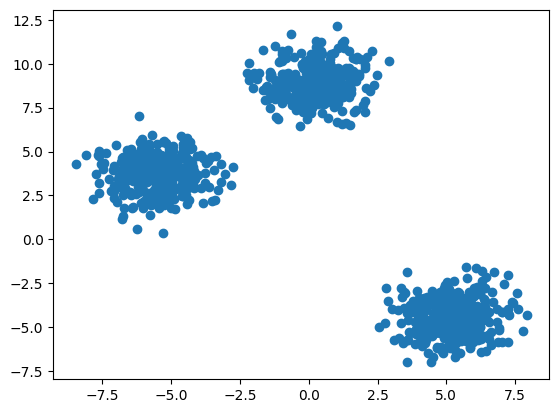

In [5]:
#selecting rows and colums and printing it
plt.scatter(X[:,0],X[:,1])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [7]:
#Kmeans Implementation
from sklearn.cluster import KMeans

In [8]:
## Manual Process
## Elbow method to select the K value

wcss=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [9]:
wcss

[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1140.4677884655125,
 992.0624178531957,
 853.5028160114393,
 754.5826899382741,
 663.7521265354399,
 579.1559561452816,
 532.8742951367033]

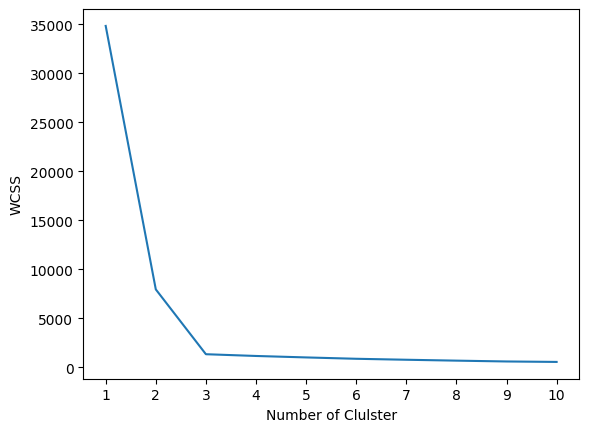

In [10]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clulster")
plt.ylabel("WCSS")
plt.show()

In [11]:
kmeans = KMeans(n_clusters=k,init='k-means++')

In [12]:
y_labels = kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
y_test_label  = kmeans.predict(X_test)

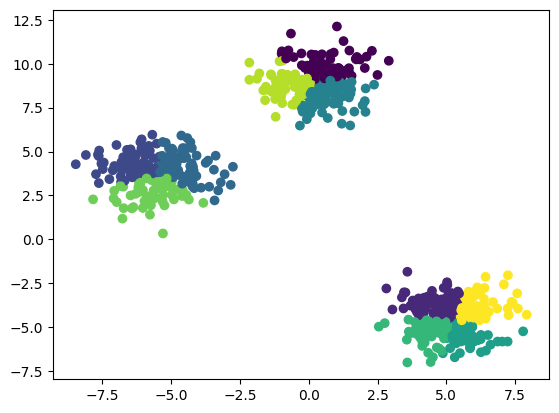

In [14]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

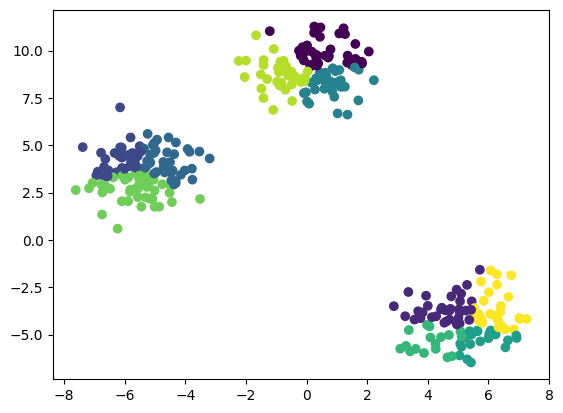

In [15]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

In [16]:
#Knee locator it finds k value automatically
!pip install kneed

In [17]:
from kneed import KneeLocator


In [18]:
#if wcss increseas we use concave otherwise convex
kl= KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [19]:
##Perfomance Metrics
from sklearn.metrics import silhouette_score

In [20]:
silhoutte_coefficients=[]
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  score= silhouette_score(X_train,kmeans.labels_)
  silhoutte_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [21]:
print(silhoutte_coefficients)

[0.7281443868598331, 0.8071181203797672, 0.6357733426488265, 0.4907093255057165, 0.33691828928108875, 0.34520917727457456, 0.3372237483329354, 0.3442695028533154, 0.3395504134005816]


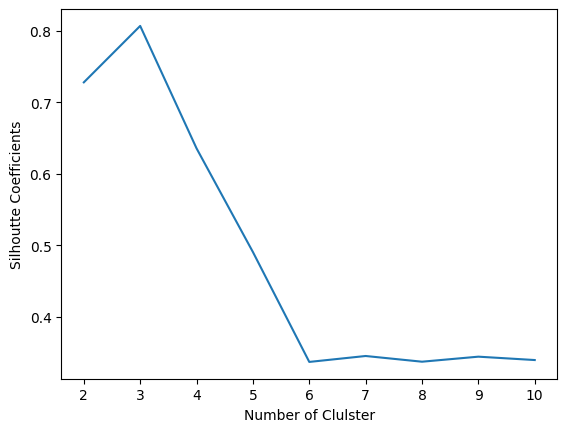

In [22]:
plt.plot(range(2,11),silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clulster")
plt.ylabel("Silhoutte Coefficients")
plt.show()